# Matplotlib and Seaborn - Univariate Charts

Python libraries that help you visualize data

In [1]:
import numpy as np
import pandas as pd

# Importing Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sb # or sns

%matplotlib inline

## Bar Chart

For qualitative variables. Depicts the distribution of a categorical variable. Height of bars indicate the frequency of the data points, that is, the count.

Base line of plot should start at 0 to avoid information distortion.

For nominal (names only) data, you may want to sort the categories by frequency - highest to lowest - which makes it easy to see which category is most common. Do not do this with ordinal data (data where variable have a natural order) when it is more important to see which labels are lower or higher on the spectrum (example: strongly disagree to strongly agree categories).

Horizontal bar chart (y = category, x = frequency) can be used when labels are hard to fit horizontally or there are several categories.


In [2]:
data = pd.Series(data = ['Gamma', 'Alpha', 'Gamma', 'Alpha', 'Beta', 'Gamma', 'Gamma', 'Delta', 'Gamma','Beta', 'Beta'])
df = pd.DataFrame({'name': data})
df

,name
0,Gamma
1,Alpha
2,Gamma
3,Alpha
4,Beta
5,Gamma
6,Gamma
7,Delta
8,Gamma
9,Beta


In [3]:
# Setting a default color for charts
base_color = sb.color_palette()[0]

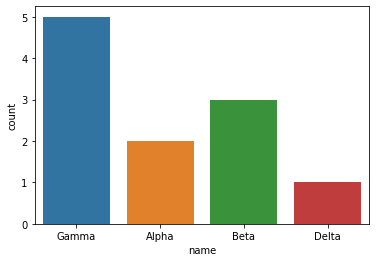

In [4]:
# Creating a bar chart
# data = datasource
# x = category/variable of interest
sb.countplot(data = df, x = 'name');

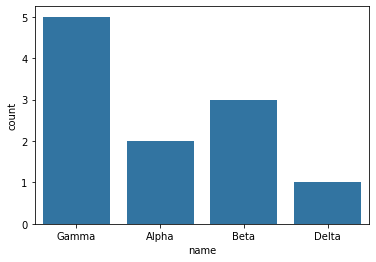

In [5]:
# Chart with same-colored bars (defaults to multicolored)
# color = set the color
sb.countplot(data = df, x = 'name', color = base_color)

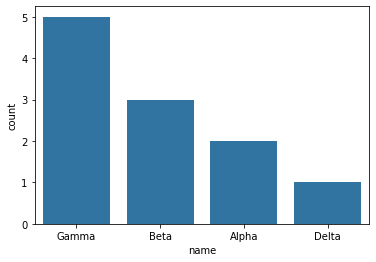

In [6]:
# Order the categories in terms of frequency

# Calculate the order with Series .value_counts() and get the index
# counts the frequency of variables and sorts them in desc order
cat_order = df['name'].value_counts().index

# Set order with order option
sb.countplot(data = df, x = 'name', color = base_color, order = cat_order);

Instead of sorting by frequency like above, you could also convert the category to an ordered type, which makes order an innate feature to that category (Pandas by default reads sting data as object types and plots them in the order they are seen in)

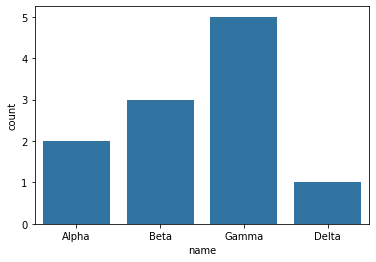

In [7]:
level_order = ['Alpha', 'Beta', 'Gamma', 'Delta']
ordered_type = pd.api.types.CategoricalDtype(ordered=True, categories=level_order)
df['name'] = df['name'].astype(ordered_type)

sb.countplot(data = df, x = 'name', color = base_color);


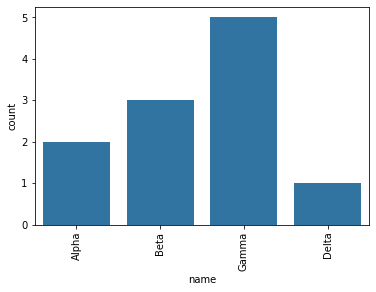

In [8]:
# Rotating category labels, in case they overlap
sb.countplot(data = df, x = 'name', color = base_color);
plt.xticks(rotation = 90);

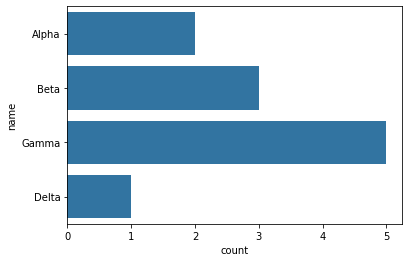

In [9]:
# Create a horizontal bar chart:
# Simply move the category to the 'y' option (to plot along y-axis)
sb.countplot(data = df, y = 'name', color = base_color);

## Relative Frequency Bar Charts

Seaborn's `countplot` shows absolute frequency, that is, the pure counts, by default. 

Displaying in relative frequency shows the proportion of the data that falls in each category. Bar height will show the proportion of data (like a percentage) each group takes from the whole.

### Scaling and relabeling the counts axis

In [10]:
# Calculate proportion taken by the most common group
# Get total number of data points
num_data_points = df.shape[0]
max_count = df['name'].value_counts().max()
max_proportion = max_count / num_data_points

print(max_proportion)

0.45454545454545453


In [11]:
# Generate tick mark locations and names
tick_proportions = np.arange(0, max_proportion, 0.05)
print(tick_proportions)
tick_names = ['{:0.2f}'.format(value) for value in tick_proportions]
print(tick_names)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45]
['0.00', '0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45']


Text(0, 0.5, 'proportion')

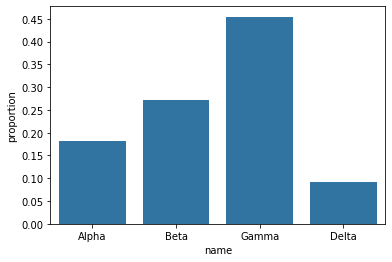

In [12]:
# Create plot
sb.countplot(data = df, x = 'name', color=base_color)

# plt.yticks(tick_locations, tick_names)
# Here tick_proportions are multiplied by the # data points to scale them
plt.yticks(tick_proportions * num_data_points, tick_names)
plt.ylabel('proportion')

### Showing percentages on the bars

You could also add text label by the bars instead. This requires looping over the tick locations and labels, adn adding a text element for each bar.

Ref: [Matplotlib text objects](https://matplotlib.org/api/text_api.html?highlight=get_text#matplotlib.text.Text)

Gamma    5
Beta     3
Alpha    2
Delta    1
Name: name, dtype: int64
locations: [0 1 2 3] 
labels: <a list of 4 Text xticklabel objects>


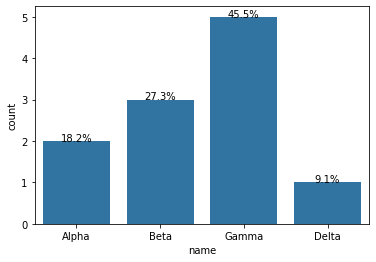

In [49]:
# Create plot
sb.countplot(data = df, x = 'name', color=base_color)

# Add labels---
## Get number of data points and category counts
num_data_points = df.shape[0]
cat_counts = df['name'].value_counts()
print(cat_counts)

## get current tick locations and labels
locations, labels = plt.xticks() 
print('locations:', locations, '\nlabels:', labels)

for location, label in zip(locations, labels):
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()] # e.g. cat_counts['Alpha']
    percent_string = '{:0.1f}%'.format(100 * count/num_data_points)
    
    # print the text elements just by the bar (.text(x, y, string, options...))
    plt.text(location, count, percent_string, ha = 'center', color = 'black')



## Pie Charts and Donut Charts

Plots relative frequencies for qualitative variables. Not as versitile as bar charts and can be harder to read, especially if there are many variables. Should generally start the first slice at 12 o' clock.

When to use:
- Showing how the data set is broken into parts
- Plotting a small number of slices (idealy 2-3, max 4-5)

Could lump smaller slices together in an "Other" slice.

In [50]:
data = pd.Series(data = ['Gamma', 'Alpha', 'Gamma', 'Alpha', 'Beta', 'Gamma', 'Gamma', 'Delta', 'Gamma','Beta', 'Beta'])
df = pd.DataFrame({'name': data})
df.head()

,name
0,Gamma
1,Alpha
2,Gamma
3,Alpha
4,Beta


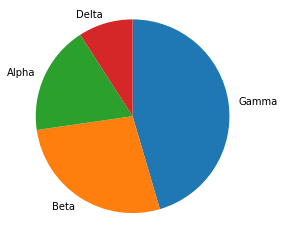

In [58]:
# Sort counts
sorted_counts = df['name'].value_counts()

# Create pie chart
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

# Make sure doesn't end up oval-shaped
plt.axis('square');


`startangle = 90` starts teh pie slice at 12 o' clock. `counterclock = False` gets the slice to go around clockwise.

#### Donut chart

Just like a pie chart but you can use `wedgeprops = {'width': val}` option to control the widtch of the fill.

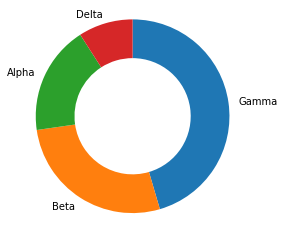

In [64]:
plt.pie(sorted_counts, labels = sorted_counts.index, startangle=90,
        counterclock=False, wedgeprops = {'width': 0.4});
plt.axis('square');

## Histograms

For quantitative variables. Similar to bar chart, feature values are on the x-axis and frequency/counts are on the y-axis, BUT they count on value ranges instead of single values.

Usually the bins include values on the left end and exclude values on the right. E.g. if a bin starts at 6, then a value of 6.0 will be included to the right of that mark.

Bin size is important for making data understandable: too big and information can be lost, too small and you can get too much noise.

Bars are right next to each other, which emphasizes the continuous range of values.

In [65]:
pokemon = pd.read_csv('./pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


By default, histograms are created with 10 bins (often too few) and are not aligned with the tick marks.

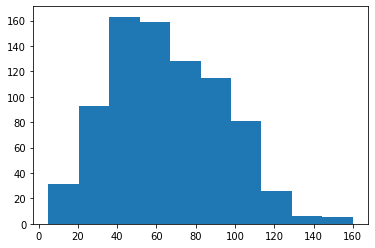

In [67]:
# Creating the default histogram to map speed
plt.hist(data = pokemon, x = 'speed');

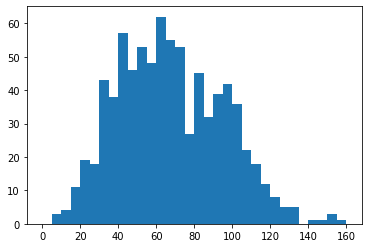

In [72]:
# Explicitly create bin array for bin size
# Start at 0 and make each bin size a range of 5. End at the max speed 
# (add a step of 5 to make sure the max value is incuded)
bins = np.arange(0, pokemon['speed'].max() + 5, 5)

# set bins with the bins option
plt.hist(data = pokemon, x = 'speed', bins = bins);

Descriptive statistics can help you figure out what min and max bin limits are appropriate. (`df['num_var'].describe()`)

In [73]:
pokemon['speed'].describe()

count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64

### Seaborn distplot alternative

Seaborns `distplot` can also be used to make histograms and provides some other plotting functions. 

Unlike `countplot` and `hist`, `distplot` must be given a Series or array with points to be plotted. (`countplot` and `hist` can be given the data source and column separately)

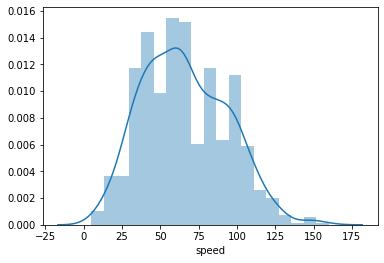

In [74]:
sb.distplot(pokemon['speed']);

The curve shows kernel density estimate (KDE). The vertical axis is based ont he KDE, so the heights do not equal 1, rather the area under the curve equals 1.

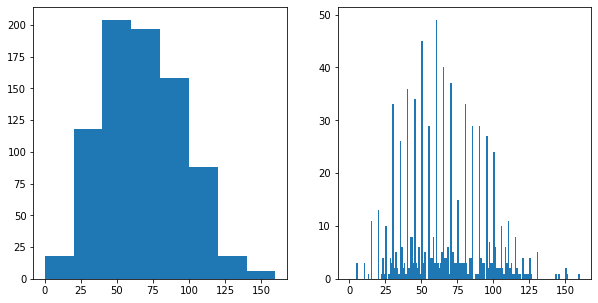

In [79]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max() + 20, 20)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max() + 1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

## Outliers and Axis Limits

Skewed data and outliers may be sign of incorrect data or values that need further investigation.

If there are outliers that don't let you see the patterns in the data, you might want to zoom in the axis limits to get a better picture.

A histogram's limits can be changed with `plt.xlim(min, max)` 

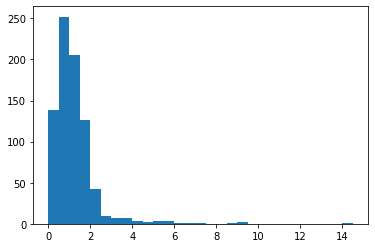

In [81]:
# Produces hard to interpret data due to the outliers
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bins);

(0, 6)

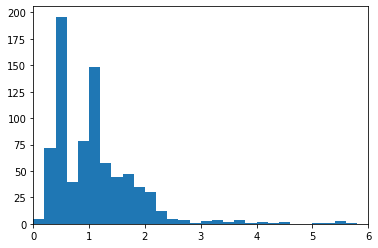

In [84]:
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins);

# Use xlim to zoom in
plt.xlim(0, 6)

## Scales and transformations

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution.

In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units. It is also a convenient approach since you won't need to engineer new features. Matplotlib's `xscale` function includes a few built-in transformations: let's use the `'log'` scale here.


([Log function review](https://www.khanacademy.org/math/algebra2/exponential-and-logarithmic-functions))

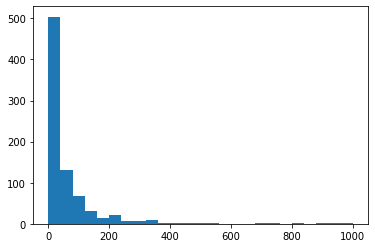

In [87]:
# Looking at pokemon weight in a histogram produces highly skewed data (units in kg)
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);

Use an axis transform to make this data more interpretable. This can be done with `plt.xscale(name_of_transformation)`. Below, let's use `'log'`.

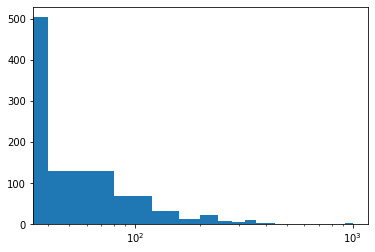

In [101]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins);
# Transform
plt.xscale('log');

This is still hard to interpret, so we need to adjust the bins. You can use the statistical description to help.

In [90]:
# Stats as-is
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [92]:
# Let's check the stats converted to log
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

The min and max in the scaled values are a min of -1 and a max of about 3. We can use that for the bin limits.

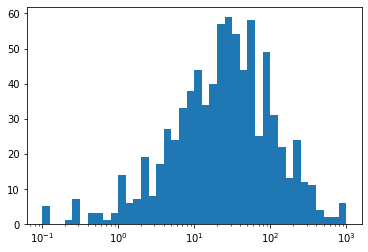

In [95]:
# adjust bins so the values are evenly spaces after taking the log
# Do this by 10**(bins)
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bins);
# Transform
plt.xscale('log');

The histogram looks better, but the ticks are not easily interpreted. For the ticks, you can use `xticks` to specify locations and labels in their natural units. Between integer powers of 10, there aren't clean values for even markings, but you canvget close: Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms. (note you may use a different base power like 2 depending on what is being plotted)

not that `xticks` needs to be specified after `xscale`

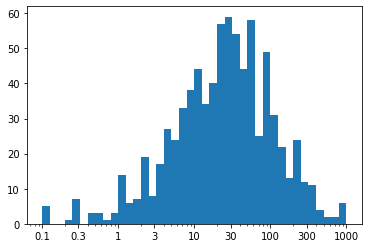

In [100]:
# Adjust ticks manually
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000] # 3 is about half-way between consecutive powers of 10 on a log scale
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);

Now it's much easier to read that the majority of weights are between 10 and 100.

Documentation for [numpy log10](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html) and [matplotlib xlabel](matplotlib xlabel)

### Alternative approach

Logarithmic transformation is not the only one possible. Also, all data values need to be positive for a log transformation because it's impossible to take the log of zero or a negative number.

If you want to use a different transformation that's not available in `xscale`, then you'll have to perform some feature engineering. In cases like this, you will want to be systematic by writing a function that applies both the transformation and its inverse. 

The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) We can create a visualization on this transformed scale like this:

```python
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

bin_edges = np.arange(0, sqrt_trans(data.max())+1, 1)
plt.hist(data.apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(data.max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))
```

Note that `data` is a pandas Series, so we can use the `apply` method for the function. If it were a NumPy Array, we would need to apply the function like in the other cases. The tick locations could have also been specified with the natural values, where we apply the standard transformation function on the first argument of `xticks` instead.